# Assignment 2
## Problem 2.1

In [1]:
import numpy as np

# import required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline
# read in the data, skip header
filename = 'randomized_data.txt'
data = np.genfromtxt(filename, delimiter=',', skip_header=4)

# print("Data", data)


# separate the input features from the target labels

# shuffle the data
shuffled_indices = np.random.permutation(data.shape[0])
data = data[shuffled_indices]

# print("Shuffle Data", data)

# separate data into testing and training
# self.input_data = np.random.choice(datasets[function_label], size=data_set_size, replace=False)
features = data[:, 1:]
labels = data[:, 0]
print("Labels", labels)
# one-hot encode the target labels

# labels -1 since we do not have a 0 class
labels = keras.utils.to_categorical(labels-1, num_classes=3)

print(labels)

# print(data.shape)
# print(labels)
# print(features.shape)
print(features[0])


Labels [2. 1. 3. 3. 1. 1. 1. 2. 1. 1. 1. 3. 2. 2. 1. 1. 1. 3. 1. 3. 3. 3. 2. 3.
 3. 2. 2. 2. 2. 1. 2. 3. 1. 2. 2. 3. 2. 2. 1. 3. 2. 3. 1. 3. 1. 1. 3. 1.
 3. 2. 3. 2. 1. 2. 1. 1. 2. 3. 3. 2. 3. 3. 2. 3. 3. 2. 1. 1. 1. 1. 2. 2.
 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2. 3. 1. 2. 2. 2. 1. 1. 3.
 1. 2. 1. 1. 2. 2. 3. 3. 3. 2. 3. 1. 1. 2. 3. 2. 1. 1. 3. 2. 3. 2. 1. 3.
 2. 3. 2. 1. 1. 3. 3. 2. 2. 2. 2. 1. 3. 2. 2. 1. 2. 1. 1. 2. 2. 3. 2. 1.
 1. 1. 2. 1. 1. 2. 2. 3. 2. 2. 1. 1. 3. 3. 3. 3. 2. 2. 1. 3. 2. 2. 1. 3.
 1. 2. 2. 1. 2. 2. 3. 3. 3. 2.]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1

In [2]:
# create a helper class for the classification models

class P2_class_model:

    def __init__(self, num_hidden_node, features, labels, num_epochs, batch_size, val_split) -> None:

        self.num_hidden_node = num_hidden_node
        self.features = features
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.val_split = val_split
        self.labels = labels
        self.model = tf.keras.models.Sequential()

        self.data_set_size= len(self.features)
        
        # Divide into 75% training and 25 % testing
        self.input_data_train_and_val = self.features[: int(self.data_set_size * 0.75)]
        self.input_data_test = self.features[int(self.data_set_size * 0.75):]
        self.target_data_train_and_val = self.labels[: int(self.data_set_size * 0.75)]
        self.target_data_test = self.labels[int(self.data_set_size * 0.75):]

    
    def create_model(self):

        # create a sequential neural network model

        # create a hidden layer with the number of hidden nodes as specified in self.num_hidden_nodes
        for hidden_nodes in self.num_hidden_node:
            self.model.add(Dense(hidden_nodes, activation='relu', input_shape=(13,)))

        # add the output layer with 3 neurons (one for each class) and 'softmax' activation
        self.model.add(Dense(3, activation='softmax'))

        # compile the model with categorical crossentropy loss and Adam optimization
        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        # self.model = self.model

    def train_model(self):

        # fit the model to the training data
        # online training hence batch size 1
        self.model.fit(self.input_data_train_and_val, self.target_data_train_and_val, epochs=self.num_epochs, batch_size=self.batch_size, validation_split=self.val_split)

    def evaluate(self):
        # evaluate the model on the test data
        score = self.model.evaluate(self.input_data_test, self.target_data_test)
        # print the accuracy of the model
        print("Accuracy:", score[1])

In [3]:
# start off very simple
p2_model_1 = P2_class_model([1], features, labels, 100, 1, 0.1)
p2_model_1.create_model()
p2_model_1.train_model()
p2_model_1.evaluate()

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 1.0988 - accuracy: 0.3697 - val_loss: 1.0967 - val_accuracy: 0.4286
Epoch 2/100
119/119 [==============================] - 0s 796us/step - loss: 1.0969 - accuracy: 0.3782 - val_loss: 1.0979 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 720us/step - loss: 1.0957 - accuracy: 0.3782 - val_loss: 1.0976 - val_accuracy: 0.4286
Epoch 4/100
119/119 [==============================] - 0s 720us/step - loss: 1.0949 - accuracy: 0.3782 - val_loss: 1.0990 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 941us/step - loss: 1.0939 - accuracy: 0.3782 - val_loss: 1.0989 - val_accuracy: 0.4286
Epoch 6/100
119/119 [==============================] - 0s 780us/step - loss: 1.0934 - accuracy: 0.3782 - val_loss: 1.0990 - val_accuracy: 0.4286
Epoch 7/100
119/119 [==============================] - 0s 729us/step - loss: 1.0925 - accuracy: 0.3782 - val_loss: 1.0997 - val_accu

In [4]:
# start off very simple
#  now increase the number of nodes
p2_model_2 = P2_class_model([16], features, labels, 100, 1, 0.1)
p2_model_2.create_model()
p2_model_2.train_model()
p2_model_2.evaluate()

Epoch 1/100
119/119 [==============================] - 0s 1ms/step - loss: 23.9472 - accuracy: 0.2941 - val_loss: 3.6225 - val_accuracy: 0.3571
Epoch 2/100
119/119 [==============================] - 0s 763us/step - loss: 3.9120 - accuracy: 0.4706 - val_loss: 5.0871 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 839us/step - loss: 3.7958 - accuracy: 0.4790 - val_loss: 2.8593 - val_accuracy: 0.3571
Epoch 4/100
119/119 [==============================] - 0s 771us/step - loss: 2.3020 - accuracy: 0.5042 - val_loss: 2.3016 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 1ms/step - loss: 1.7199 - accuracy: 0.5294 - val_loss: 1.6375 - val_accuracy: 0.7143
Epoch 6/100
119/119 [==============================] - 0s 864us/step - loss: 1.1495 - accuracy: 0.6807 - val_loss: 2.5272 - val_accuracy: 0.5000
Epoch 7/100
119/119 [==============================] - 0s 898us/step - loss: 1.2186 - accuracy: 0.7059 - val_loss: 1.2137 - val_accur

In [5]:
# now increase the number of nodes and hidden layers
p2_model_3 = P2_class_model([16, 4], features, labels, 100, 1, 0.1)
p2_model_3.create_model()
p2_model_3.train_model()
p2_model_3.evaluate()

Epoch 1/100
119/119 [==============================] - 0s 1ms/step - loss: 91.8775 - accuracy: 0.2689 - val_loss: 11.4333 - val_accuracy: 0.3571
Epoch 2/100
119/119 [==============================] - 0s 771us/step - loss: 2.7138 - accuracy: 0.3193 - val_loss: 1.1191 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 881us/step - loss: 1.0781 - accuracy: 0.4622 - val_loss: 1.1320 - val_accuracy: 0.4286
Epoch 4/100
119/119 [==============================] - 0s 814us/step - loss: 1.0802 - accuracy: 0.4454 - val_loss: 1.1053 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 873us/step - loss: 1.0838 - accuracy: 0.4286 - val_loss: 1.1017 - val_accuracy: 0.4286
Epoch 6/100
119/119 [==============================] - 0s 847us/step - loss: 1.0854 - accuracy: 0.3950 - val_loss: 1.1042 - val_accuracy: 0.5000
Epoch 7/100
119/119 [==============================] - 0s 856us/step - loss: 1.0788 - accuracy: 0.4538 - val_loss: 1.1236 - val_ac

In [6]:
#  now increase the number of nodes and hidden layers and epochs
p2_model_4 = P2_class_model([16, 4], features, labels, 200, 1, 0.1)
p2_model_4.create_model()
p2_model_4.train_model()
p2_model_4.evaluate()

Epoch 1/200
119/119 [==============================] - 0s 2ms/step - loss: 18.9140 - accuracy: 0.4874 - val_loss: 1.7066 - val_accuracy: 0.4286
Epoch 2/200
119/119 [==============================] - 0s 788us/step - loss: 1.0203 - accuracy: 0.5042 - val_loss: 1.0025 - val_accuracy: 0.5000
Epoch 3/200
119/119 [==============================] - 0s 873us/step - loss: 0.8415 - accuracy: 0.6218 - val_loss: 0.9953 - val_accuracy: 0.5000
Epoch 4/200
119/119 [==============================] - 0s 856us/step - loss: 0.7728 - accuracy: 0.6639 - val_loss: 0.9748 - val_accuracy: 0.5000
Epoch 5/200
119/119 [==============================] - 0s 890us/step - loss: 0.8758 - accuracy: 0.5798 - val_loss: 0.9819 - val_accuracy: 0.5000
Epoch 6/200
119/119 [==============================] - 0s 924us/step - loss: 0.8329 - accuracy: 0.6218 - val_loss: 0.9769 - val_accuracy: 0.5000
Epoch 7/200
119/119 [==============================] - 0s 890us/step - loss: 0.8283 - accuracy: 0.6134 - val_loss: 0.9718 - val_acc

In [7]:
#  now increase the number of nodes and hidden layers
p2_model_5 = P2_class_model([128, 64], features, labels, 100, 1, 0.1)
p2_model_5.create_model()
p2_model_5.train_model()
p2_model_5.evaluate()

Epoch 1/100
119/119 [==============================] - 0s 1ms/step - loss: 7.6040 - accuracy: 0.4034 - val_loss: 2.1909 - val_accuracy: 0.5000
Epoch 2/100
119/119 [==============================] - 0s 763us/step - loss: 4.8212 - accuracy: 0.5126 - val_loss: 9.3170 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 797us/step - loss: 4.2385 - accuracy: 0.5714 - val_loss: 11.9695 - val_accuracy: 0.4286
Epoch 4/100
119/119 [==============================] - 0s 1ms/step - loss: 4.1907 - accuracy: 0.5630 - val_loss: 9.4933 - val_accuracy: 0.3571
Epoch 5/100
119/119 [==============================] - 0s 847us/step - loss: 4.0339 - accuracy: 0.6975 - val_loss: 2.1434 - val_accuracy: 0.4286
Epoch 6/100
119/119 [==============================] - 0s 847us/step - loss: 2.3078 - accuracy: 0.6807 - val_loss: 4.2709 - val_accuracy: 0.5000
Epoch 7/100
119/119 [==============================] - 0s 822us/step - loss: 3.2313 - accuracy: 0.6471 - val_loss: 4.4100 - val_accur

In [8]:
#  now increase the number of nodes and hidden layers
p2_model_6 = P2_class_model([128, 64], features, labels, 300, 1, 0.1)
p2_model_6.create_model()
p2_model_6.train_model()
p2_model_6.evaluate()

Epoch 1/300
119/119 [==============================] - 0s 2ms/step - loss: 9.3881 - accuracy: 0.4874 - val_loss: 6.1807 - val_accuracy: 0.4286
Epoch 2/300
119/119 [==============================] - 0s 788us/step - loss: 5.7484 - accuracy: 0.5462 - val_loss: 1.5522 - val_accuracy: 0.7143
Epoch 3/300
119/119 [==============================] - 0s 814us/step - loss: 4.0386 - accuracy: 0.6050 - val_loss: 1.2682 - val_accuracy: 0.5000
Epoch 4/300
119/119 [==============================] - 0s 839us/step - loss: 4.5487 - accuracy: 0.5882 - val_loss: 4.2038 - val_accuracy: 0.4286
Epoch 5/300
119/119 [==============================] - 0s 890us/step - loss: 3.2870 - accuracy: 0.5966 - val_loss: 3.4098 - val_accuracy: 0.5000
Epoch 6/300
119/119 [==============================] - 0s 890us/step - loss: 3.5741 - accuracy: 0.6471 - val_loss: 4.6785 - val_accuracy: 0.5000
Epoch 7/300
119/119 [==============================] - 0s 881us/step - loss: 2.8587 - accuracy: 0.6134 - val_loss: 8.0929 - val_accu

In [9]:
#  example 128, 4
p2_model_7 = P2_class_model([128], features, labels, 100, 1, 0.1)
p2_model_7.create_model()
p2_model_7.train_model()
p2_model_7.evaluate()

Epoch 1/100
119/119 [==============================] - 0s 2ms/step - loss: 5.7422 - accuracy: 0.4874 - val_loss: 7.5011 - val_accuracy: 0.4286
Epoch 2/100
119/119 [==============================] - 0s 873us/step - loss: 2.6455 - accuracy: 0.6218 - val_loss: 2.4833 - val_accuracy: 0.6429
Epoch 3/100
119/119 [==============================] - 0s 797us/step - loss: 4.6192 - accuracy: 0.6387 - val_loss: 1.9326 - val_accuracy: 0.5000
Epoch 4/100
119/119 [==============================] - 0s 864us/step - loss: 2.5143 - accuracy: 0.6807 - val_loss: 5.2580 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 856us/step - loss: 3.6987 - accuracy: 0.6891 - val_loss: 1.8981 - val_accuracy: 0.5714
Epoch 6/100
119/119 [==============================] - 0s 788us/step - loss: 3.0883 - accuracy: 0.6471 - val_loss: 4.4081 - val_accuracy: 0.5714
Epoch 7/100
119/119 [==============================] - 0s 780us/step - loss: 2.4619 - accuracy: 0.6555 - val_loss: 3.3589 - val_accu

In [10]:
#  example 128, 4
p2_model_8 = P2_class_model([128], features, labels, 400, 1, 0.1)
p2_model_8.create_model()
p2_model_8.train_model()
p2_model_8.evaluate()

Epoch 1/400
119/119 [==============================] - 0s 1ms/step - loss: 9.9582 - accuracy: 0.4790 - val_loss: 5.8274 - val_accuracy: 0.4286
Epoch 2/400
119/119 [==============================] - 0s 737us/step - loss: 3.4607 - accuracy: 0.5966 - val_loss: 1.2213 - val_accuracy: 0.5714
Epoch 3/400
119/119 [==============================] - 0s 822us/step - loss: 2.0660 - accuracy: 0.6891 - val_loss: 5.4995 - val_accuracy: 0.5714
Epoch 4/400
119/119 [==============================] - 0s 814us/step - loss: 3.5427 - accuracy: 0.5966 - val_loss: 4.0430 - val_accuracy: 0.5000
Epoch 5/400
119/119 [==============================] - 0s 831us/step - loss: 1.6962 - accuracy: 0.6471 - val_loss: 0.6070 - val_accuracy: 0.7143
Epoch 6/400
119/119 [==============================] - 0s 763us/step - loss: 2.0130 - accuracy: 0.7227 - val_loss: 4.8151 - val_accuracy: 0.4286
Epoch 7/400
119/119 [==============================] - 0s 831us/step - loss: 2.6484 - accuracy: 0.6807 - val_loss: 5.3044 - val_accu

In [11]:
#  example 128, 4
p2_model_9 = P2_class_model([128], features, labels, 100, 32, 0.1)
p2_model_9.create_model()
p2_model_9.train_model()
p2_model_9.evaluate()

Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 176.0526 - accuracy: 0.2689 - val_loss: 116.3720 - val_accuracy: 0.3571
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 117.2141 - accuracy: 0.2689 - val_loss: 68.1804 - val_accuracy: 0.3571
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 59.9572 - accuracy: 0.2689 - val_loss: 20.7880 - val_accuracy: 0.3571
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 14.2962 - accuracy: 0.2857 - val_loss: 19.2762 - val_accuracy: 0.2143
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 15.3323 - accuracy: 0.3277 - val_loss: 25.1499 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 19.9772 - accuracy: 0.3697 - val_loss: 28.6143 - val_accuracy: 0.2143
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 21.3016 - accuracy: 0.3529 - val_loss: 27.2051 - val_accuracy: 0.2143
Epoch 8/1

In [12]:
#  example 128, 4
p2_model_10 = P2_class_model([128], features, labels, 100, 64, 0.1)
p2_model_10.create_model()
p2_model_10.train_model()
p2_model_10.evaluate()

Epoch 1/100
2/2 [==============================] - 0s 90ms/step - loss: 21.6448 - accuracy: 0.3529 - val_loss: 10.6109 - val_accuracy: 0.1429
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 10.2649 - accuracy: 0.2437 - val_loss: 5.5607 - val_accuracy: 0.3571
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 9.9599 - accuracy: 0.3277 - val_loss: 9.5319 - val_accuracy: 0.4286
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 10.9078 - accuracy: 0.3613 - val_loss: 4.5332 - val_accuracy: 0.2857
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 5.0798 - accuracy: 0.2437 - val_loss: 7.8838 - val_accuracy: 0.2143
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 6.5764 - accuracy: 0.3529 - val_loss: 7.8382 - val_accuracy: 0.2143
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 6.1883 - accuracy: 0.2185 - val_loss: 7.3658 - val_accuracy: 0.3571
Epoch 8/100
2/2 

In [13]:
#  now increase the number of nodes and hidden layers and epochs
p2_model_11 = P2_class_model([16, 4, 2], features, labels, 200, 1, 0.1)
p2_model_11.create_model()
p2_model_11.train_model()
p2_model_11.evaluate()

Epoch 1/200
119/119 [==============================] - 0s 2ms/step - loss: 1.0988 - accuracy: 0.3361 - val_loss: 1.0983 - val_accuracy: 0.4286
Epoch 2/200
119/119 [==============================] - 0s 746us/step - loss: 1.0972 - accuracy: 0.3025 - val_loss: 1.0996 - val_accuracy: 0.4286
Epoch 3/200
119/119 [==============================] - 0s 771us/step - loss: 1.0960 - accuracy: 0.3782 - val_loss: 1.0994 - val_accuracy: 0.4286
Epoch 4/200
119/119 [==============================] - 0s 814us/step - loss: 1.0948 - accuracy: 0.3782 - val_loss: 1.0991 - val_accuracy: 0.4286
Epoch 5/200
119/119 [==============================] - 0s 754us/step - loss: 1.0941 - accuracy: 0.3529 - val_loss: 1.0999 - val_accuracy: 0.4286
Epoch 6/200
119/119 [==============================] - 0s 822us/step - loss: 1.0932 - accuracy: 0.3782 - val_loss: 1.1001 - val_accuracy: 0.4286
Epoch 7/200
119/119 [==============================] - 0s 873us/step - loss: 1.0929 - accuracy: 0.3782 - val_loss: 1.1003 - val_accu

In [14]:
#  now increase the number of nodes and hidden layers and epochs
p2_model_12 = P2_class_model([8, 2], features, labels, 200, 1, 0.1)
p2_model_12.create_model()
p2_model_12.train_model()
p2_model_12.evaluate()

Epoch 1/200
119/119 [==============================] - 0s 1ms/step - loss: 1.7524 - accuracy: 0.3697 - val_loss: 1.0021 - val_accuracy: 0.5714
Epoch 2/200
119/119 [==============================] - 0s 695us/step - loss: 1.1555 - accuracy: 0.4538 - val_loss: 1.0694 - val_accuracy: 0.2857
Epoch 3/200
119/119 [==============================] - 0s 780us/step - loss: 1.0849 - accuracy: 0.4370 - val_loss: 1.0723 - val_accuracy: 0.2857
Epoch 4/200
119/119 [==============================] - 0s 746us/step - loss: 1.0869 - accuracy: 0.4286 - val_loss: 1.0757 - val_accuracy: 0.2857
Epoch 5/200
119/119 [==============================] - 0s 788us/step - loss: 1.0794 - accuracy: 0.4454 - val_loss: 1.0619 - val_accuracy: 0.2857
Epoch 6/200
119/119 [==============================] - 0s 814us/step - loss: 1.1003 - accuracy: 0.4202 - val_loss: 1.0483 - val_accuracy: 0.4286
Epoch 7/200
119/119 [==============================] - 0s 847us/step - loss: 1.0846 - accuracy: 0.4202 - val_loss: 1.0949 - val_accu

In [15]:
#  now increase the number of nodes and hidden layers and epochs
p2_model_13 = P2_class_model([64, 32, 16], features, labels, 300, 1, 0.1)
p2_model_13.create_model()
p2_model_13.train_model()
p2_model_13.evaluate()

Epoch 1/300
119/119 [==============================] - 0s 1ms/step - loss: 11.2068 - accuracy: 0.4454 - val_loss: 3.0566 - val_accuracy: 0.4286
Epoch 2/300
119/119 [==============================] - 0s 763us/step - loss: 3.6586 - accuracy: 0.5462 - val_loss: 5.5064 - val_accuracy: 0.5000
Epoch 3/300
119/119 [==============================] - 0s 788us/step - loss: 2.2056 - accuracy: 0.5630 - val_loss: 14.4887 - val_accuracy: 0.2143
Epoch 4/300
119/119 [==============================] - 0s 788us/step - loss: 1.5932 - accuracy: 0.6891 - val_loss: 3.2382 - val_accuracy: 0.2857
Epoch 5/300
119/119 [==============================] - 0s 814us/step - loss: 2.3790 - accuracy: 0.6891 - val_loss: 9.2412 - val_accuracy: 0.2143
Epoch 6/300
119/119 [==============================] - 0s 797us/step - loss: 2.7391 - accuracy: 0.5966 - val_loss: 2.9297 - val_accuracy: 0.5000
Epoch 7/300
119/119 [==============================] - 0s 822us/step - loss: 2.1753 - accuracy: 0.6555 - val_loss: 0.7128 - val_ac

In [16]:
#  now increase the number of nodes and hidden layers and epochs
p2_model_14 = P2_class_model([64, 32, 16], features, labels, 300, 1, 0.2)
p2_model_14.create_model()
p2_model_14.train_model()
p2_model_14.evaluate()

Epoch 1/300
106/106 [==============================] - 0s 2ms/step - loss: 14.9486 - accuracy: 0.4528 - val_loss: 1.9090 - val_accuracy: 0.5185
Epoch 2/300
106/106 [==============================] - 0s 905us/step - loss: 2.0890 - accuracy: 0.5755 - val_loss: 3.9569 - val_accuracy: 0.4815
Epoch 3/300
106/106 [==============================] - 0s 876us/step - loss: 3.7688 - accuracy: 0.5189 - val_loss: 1.9992 - val_accuracy: 0.6296
Epoch 4/300
106/106 [==============================] - 0s 981us/step - loss: 1.6708 - accuracy: 0.6604 - val_loss: 0.7544 - val_accuracy: 0.7037
Epoch 5/300
106/106 [==============================] - 0s 1ms/step - loss: 1.4800 - accuracy: 0.6698 - val_loss: 0.5213 - val_accuracy: 0.8519
Epoch 6/300
106/106 [==============================] - 0s 1ms/step - loss: 1.9465 - accuracy: 0.6132 - val_loss: 0.6858 - val_accuracy: 0.7407
Epoch 7/300
106/106 [==============================] - 0s 991us/step - loss: 1.0241 - accuracy: 0.6604 - val_loss: 10.9183 - val_accura

In [17]:

p2_model_15 = P2_class_model([128], features, labels, 50, 1, 0.1)
p2_model_15.create_model()
p2_model_15.train_model()
p2_model_15.evaluate()

Epoch 1/50
119/119 [==============================] - 0s 1ms/step - loss: 11.0150 - accuracy: 0.5210 - val_loss: 4.4225 - val_accuracy: 0.4286
Epoch 2/50
119/119 [==============================] - 0s 746us/step - loss: 2.3546 - accuracy: 0.5882 - val_loss: 2.9907 - val_accuracy: 0.4286
Epoch 3/50
119/119 [==============================] - 0s 780us/step - loss: 2.8495 - accuracy: 0.6471 - val_loss: 4.6205 - val_accuracy: 0.4286
Epoch 4/50
119/119 [==============================] - 0s 831us/step - loss: 2.3484 - accuracy: 0.6387 - val_loss: 6.1573 - val_accuracy: 0.2857
Epoch 5/50
119/119 [==============================] - 0s 847us/step - loss: 1.7182 - accuracy: 0.6807 - val_loss: 12.6277 - val_accuracy: 0.2857
Epoch 6/50
119/119 [==============================] - 0s 839us/step - loss: 3.5626 - accuracy: 0.6975 - val_loss: 4.3234 - val_accuracy: 0.4286
Epoch 7/50
119/119 [==============================] - 0s 822us/step - loss: 1.7003 - accuracy: 0.7311 - val_loss: 4.3966 - val_accuracy:

In [18]:
p2_model_16 = P2_class_model([128, 64, 32, 16, 4], features, labels, 100, 1, 0.1)
p2_model_16.create_model()
p2_model_16.train_model()
p2_model_16.evaluate()

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 2.0694 - accuracy: 0.4370 - val_loss: 1.0943 - val_accuracy: 0.4286
Epoch 2/100
119/119 [==============================] - 0s 839us/step - loss: 1.0993 - accuracy: 0.3782 - val_loss: 1.0946 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 913us/step - loss: 1.0978 - accuracy: 0.3782 - val_loss: 1.0946 - val_accuracy: 0.4286
Epoch 4/100
119/119 [==============================] - 0s 950us/step - loss: 1.0965 - accuracy: 0.3782 - val_loss: 1.0954 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 941us/step - loss: 1.0953 - accuracy: 0.3782 - val_loss: 1.0969 - val_accuracy: 0.4286
Epoch 6/100
119/119 [==============================] - 0s 924us/step - loss: 1.0941 - accuracy: 0.3782 - val_loss: 1.0965 - val_accuracy: 0.4286
Epoch 7/100
119/119 [==============================] - 0s 928us/step - loss: 1.0935 - accuracy: 0.3782 - val_loss: 1.0976 - val_accu

In [19]:
p2_model_1 = P2_class_model([2], features, labels, 100, 1, 0.1)
p2_model_1.create_model()
p2_model_1.train_model()
p2_model_1.evaluate()

Epoch 1/100
119/119 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3529 - val_loss: 1.0998 - val_accuracy: 0.2143
Epoch 2/100
119/119 [==============================] - 0s 805us/step - loss: 1.0968 - accuracy: 0.3445 - val_loss: 1.0994 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 754us/step - loss: 1.0956 - accuracy: 0.2857 - val_loss: 1.0997 - val_accuracy: 0.4286
Epoch 4/100
119/119 [==============================] - 0s 780us/step - loss: 1.0946 - accuracy: 0.3782 - val_loss: 1.1002 - val_accuracy: 0.4286
Epoch 5/100
119/119 [==============================] - 0s 864us/step - loss: 1.0936 - accuracy: 0.3782 - val_loss: 1.0998 - val_accuracy: 0.4286
Epoch 6/100
119/119 [==============================] - 0s 1ms/step - loss: 1.0929 - accuracy: 0.3782 - val_loss: 1.1004 - val_accuracy: 0.4286
Epoch 7/100
119/119 [==============================] - 0s 898us/step - loss: 1.0923 - accuracy: 0.3782 - val_loss: 1.1012 - val_accura

In [34]:
# 2.2 test each on the best model 
p2_model_best = P2_class_model([128], features, labels, 100, 1, 0.1)
p2_model_best.create_model()
p2_model_best.train_model()
p2_model_best.evaluate()


Epoch 1/100
119/119 [==============================] - 0s 1ms/step - loss: 9.4510 - accuracy: 0.4286 - val_loss: 0.8797 - val_accuracy: 0.5714
Epoch 2/100
119/119 [==============================] - 0s 763us/step - loss: 4.4725 - accuracy: 0.5462 - val_loss: 12.2767 - val_accuracy: 0.4286
Epoch 3/100
119/119 [==============================] - 0s 746us/step - loss: 4.0424 - accuracy: 0.5546 - val_loss: 5.2929 - val_accuracy: 0.5000
Epoch 4/100
119/119 [==============================] - 0s 788us/step - loss: 2.9838 - accuracy: 0.6218 - val_loss: 0.6308 - val_accuracy: 0.9286
Epoch 5/100
119/119 [==============================] - 0s 788us/step - loss: 1.8138 - accuracy: 0.7059 - val_loss: 3.2116 - val_accuracy: 0.5714
Epoch 6/100
119/119 [==============================] - 0s 822us/step - loss: 1.8451 - accuracy: 0.7227 - val_loss: 2.0054 - val_accuracy: 0.5714
Epoch 7/100
119/119 [==============================] - 0s 831us/step - loss: 2.8912 - accuracy: 0.7227 - val_loss: 3.5955 - val_acc

In [21]:
# 2.2 a
a = np.array([[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285]])
p2_model_best.model.predict(a)


array([[1.0000000e+00, 7.5129296e-13, 8.6529956e-30]], dtype=float32)

In [22]:
# 2.2 b
b = np.array([[12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580]])
p2_model_best.model.predict(b)

array([[7.1351826e-07, 9.9999833e-01, 9.9317219e-07]], dtype=float32)

In [23]:
# 2.2 c
c = np.array([[14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]])
p2_model_best.model.predict(c)

array([[2.2075462e-15, 3.7493930e-08, 1.0000000e+00]], dtype=float32)

[1 1 0 1 0 0 1 1 2 1 0 0 0 1 0 0 1 1 2 1 1 0 0 2 2 2 2 1 1 0 2 1 1 0 2 0 1
 1 0 1 1 2 2 2 1]
[[14  0  0]
 [ 0 19  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

   Product 1       1.00      1.00      1.00        14
   Product 2       1.00      0.95      0.97        20
   Product 3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



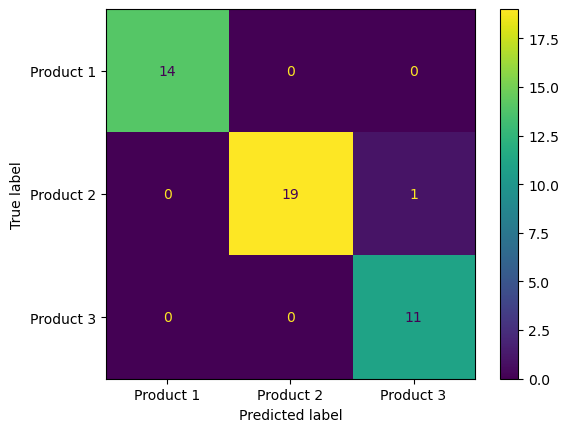

In [35]:
# Test final model with confusion matrix

# output = model.predict_classes(test_x)
class_names = ['Product 1', 'Product 2', 'Product 3']
test_data = p2_model_best.input_data_test
test_labels = p2_model_best.target_data_test

# convert test labels from one hot encoded by to class form
test_labels = np.argmax(test_labels, axis=1)
output =np.argmax(p2_model_best.model.predict(test_data), axis=-1)

# print(test_data.shape)
print(test_labels)
cm_mlp = confusion_matrix(test_labels, output)
print(cm_mlp)
print(classification_report(test_labels, output, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_mlp,display_labels=class_names)
disp1.plot()